<a href="https://colab.research.google.com/github/AmrinKareem/PyTorch-DeepLearning/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

In [ ]:
what_we_cover = {1: "Prepare and load data",
                 2: "Build model",
                 3: "Fit the model to data",
                 4: "Make predictions",
                 5: "Save and load a model",
                 6: "Put everything together"}
what_we_cover

{1: 'Prepare and load data',
 2: 'Build model',
 3: 'Fit the model to data',
 4: 'Make predictions',
 5: 'Save and load a model',
 6: 'Put everything together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
#Check PyTorch version
torch.__version__

'1.13.0+cu116'

## 1. Data (Prepare and load)

In [ ]:
#Create known parameters

weight = 0.7
bias = 0.3

#Create a range 
start = 0
end = 1
step =  0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

##Split into train and test sets


In [ ]:
#Create train-test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

## How to better Visualize data?

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize =(10,7))
  #Plot training data in blue 
  plt.scatter(train_data, train_labels, c = "b", s = 4, label ="Training Data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label ="Test Data")
  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")
  
  #Show the legend
  plt.legend(prop = {"size":14});



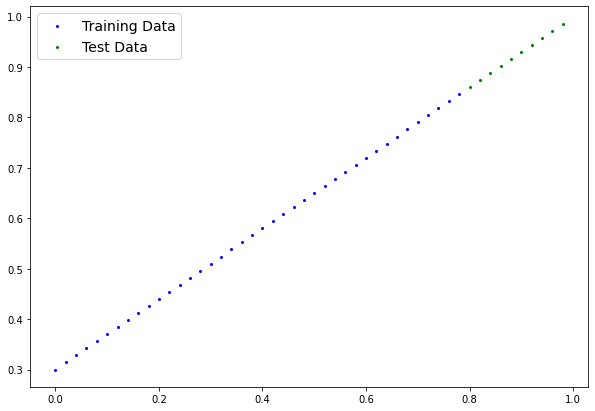

In [ ]:
plot_predictions();

## Build a Model 

This model starts with random values of weight and bias, and then updates them iteratively to match the data distribution 

Forward method takes the training data as a torch tensor and returns a torch tensor - defines a forward computation in the model

In [ ]:
#Create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): #nn.Module is the base class for all neural network modules - almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    #Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, #random initialisation of weight 
                                            requires_grad = True, #Pytorch tracks the gradients of this parameter by default
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, #random initialisation of bias 
                                         requires_grad = True, 
                                         dtype = torch.float))

    #Forward method to define the computation
  def forward(self, x:torch.Tensor) -> torch.Tensor: #x is the input data a
    return self.weights*x + self.bias # this is the linear regression formula


In [ ]:
#PyTorch Model Building Essentials

#torch.nn
#torch.nn.Parameter
#torch.nn.Module
#torch.optim
#torch.utils.data.Dataset
#torch.utils.data.DataLoader

In [ ]:

#Create a random seed
torch.manual_seed(42)

#Create an instance of the model
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Named Parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
### Making predictions using torch.inference_mode()
with torch.inference_mode(): #context manager, turns off gradient tracking so that the PyTorch code runs faster
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

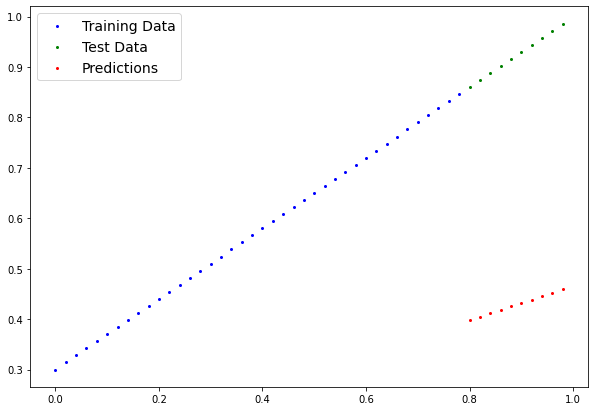

In [ ]:
#visualize the predictions
plot_predictions(predictions = y_preds)

Here the model performs poorly because it is initialised with random values. To measure how poor the model's prediction is, we need to use a loss function. 

Loss Function

Optimizer

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
##Loss Function
loss_fn = nn.L1Loss() #MAE

#Setup an optimizer (SGD)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

## Training Loop and Testing Loop
0. Loop through the data
1. Forward pass (data moves through the model's forward function)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards to calculate the gradients of each of the parameters wrt the loss
5. Optimizer step - adjust parameters and improve the loss 





In [ ]:
#An epoch is one loop through the data
torch.manual_seed(42)
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []
####Training
#0. loop through the data
for epoch in range(epochs):
  #Set the model to train mode
  model_0.train() #sets all parameters that require gradients to "requires gradients" 

  #1. Forward Pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print("Loss:", loss)
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss wrt parameters of the model
  loss.backward()
  
    #5. Step the optimizer (perform gradient descent)
  optimizer.step()
  
  ##Testing

  model_0.eval() #turns off settings not needed for evaluation/testing
  with torch.inference_mode():
  #1. Do the forward pass
    test_pred = model_0(X_test)

  #2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)
    
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss: {test_loss}")
    #print out model state dictionary
    print(model_0.state_dict())

Epoch: 0 | Loss:0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss:0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss:0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss:0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss:0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss:0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss:0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

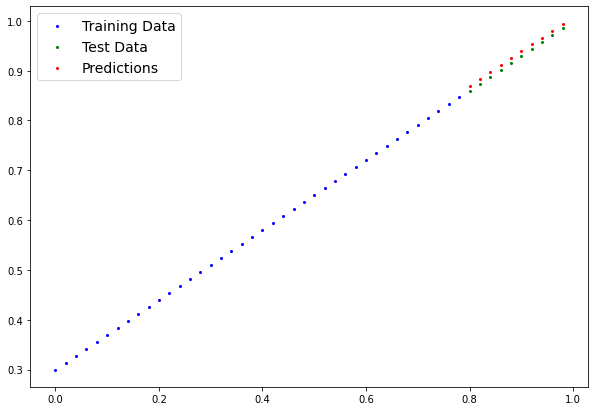

In [ ]:
plot_predictions(predictions = y_preds)

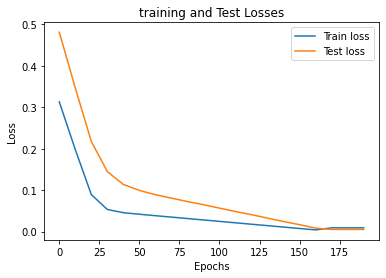

In [ ]:
import numpy as np
#Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss" )
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("training and Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## Save and load a Model in PyTorch

In [ ]:
#torch.save()
#torch.load()
#torch.nn.Module.load_state_dict()

from  pathlib import Path
#1. Create a model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_PyTorch_worklow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)


Saving model to: models/01_PyTorch_worklow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1203 Jan 16 17:25 01_PyTorch_worklow_model_0.pth


In [ ]:
#To load a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state dict of model 0 
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  y_preds_loaded = loaded_model_0(X_test)

y_preds_loaded

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Compare loaded model preds with orginal model preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it Together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.0+cu116'

In [ ]:
#Create device agnostic code
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {DEVICE}")

Device: cuda


1. Data

In [ ]:
#Create data using the linear regression formula y = weight*X + bias
weight = 0.7
bias = 0.3


#Create X and y (features and labels)
X = torch.arange(0,1,0.02).unsqueeze(dim =1)
y = weight*X + bias 

#Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

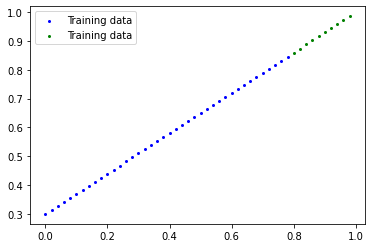

In [ ]:
#Plot the data

plt.scatter(X_train, y_train, c = 'b', s = 4, label = "Training data")
plt.scatter(X_test, y_test, c = 'g', s = 4, label = "Training data")
plt.legend();


In [ ]:
#Build a PyTorch Linear Model
from torch import nn
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

  #Use nn.Linear() for creating model parameters / aka linear transform, probing layer, dense layer, fully connected layer
    self.linear_layer = nn.Linear(in_features = 1, 
                                  out_features = 1)
    #self.weights = nn.Parameter(torch.randn(1, 
                              #requires_grad =  True,
                              #dtype = torch.float))
    #self.bias = nn.Parameter(torch.randn(1, 
                            #requires_grad = True,
                            #dtype = torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x) 


In [ ]:
torch.manual_seed(42)
# Creating an instance of the calss
model_1 = LinearRegressionModelV2()

list(model_1.parameters())
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
#Check the device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(DEVICE)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Set up loss function
loss_fn = nn.L1Loss()

#Set up optmizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
#Training Loop

torch.manual_seed(42)
epochs = 200

#device agnostic code
X_train = X_train.to(DEVICE)
y_train = y_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

for epoch in range(epochs):
  model_1.train()

   #1. Forward pass
  y_pred = model_1(X_train)

   #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

   #3. Optimizer zero grad
  optimizer.zero_grad()

   #4. Backpropagate
  loss.backward()

   #5. Optimizer step
  optimizer.step()


##testing

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    print(f"Epoch :{epoch} | Loss: {loss} | Test loss : {test_loss}")

Epoch :0 | Loss: 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch :10 | Loss: 0.439968079328537 | Test loss : 0.4392664134502411
Epoch :20 | Loss: 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch :30 | Loss: 0.20954833924770355 | Test loss : 0.16984669864177704
Epoch :40 | Loss: 0.09433845430612564 | Test loss : 0.03513690456748009
Epoch :50 | Loss: 0.023886388167738914 | Test loss : 0.04784907028079033
Epoch :60 | Loss: 0.019956795498728752 | Test loss : 0.045803118497133255
Epoch :70 | Loss: 0.016517987474799156 | Test loss : 0.037530567497015
Epoch :80 | Loss: 0.013089174404740334 | Test loss : 0.02994490973651409
Epoch :90 | Loss: 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch :100 | Loss: 0.006215683650225401 | Test loss : 0.014086711220443249
Epoch :110 | Loss: 0.00278724217787385 | Test loss : 0.005814164876937866
Epoch :120 | Loss: 0.0012645035749301314 | Test loss : 0.013801801018416882
Epoch :130 | Loss: 0.0012645035749301314 | Test loss : 0.0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

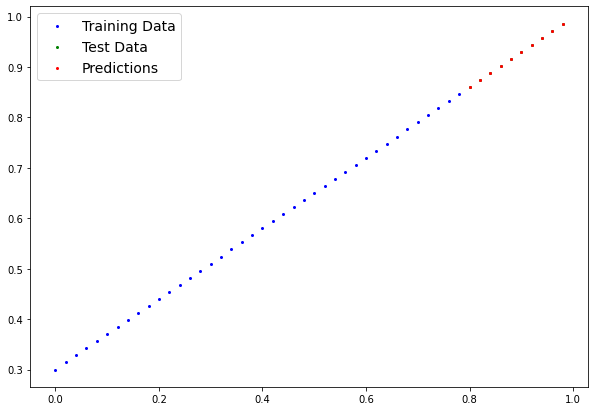

In [ ]:
plot_predictions(predictions = y_preds.cpu())

In [ ]:
###Saving and loading
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_NAME = "01_pytorch_workflow_model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)


In [ ]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(DEVICE)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  y_preds = loaded_model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')